# Bonus 1. The Problem of Waiting for My Luggage (optional)

### A. After 5 minutes, what is the conditional probability that the luggage is still on the airplane? (It means I can't see the luggage in these five minutes.)
P(L = t) = 1 - (0.5 + t/20).
After 5 minutes, the conditional probability that the luggage is still on the plane is 0.75.

### B. How does the conditional probability change over time? Use a plot to show the change in probability.

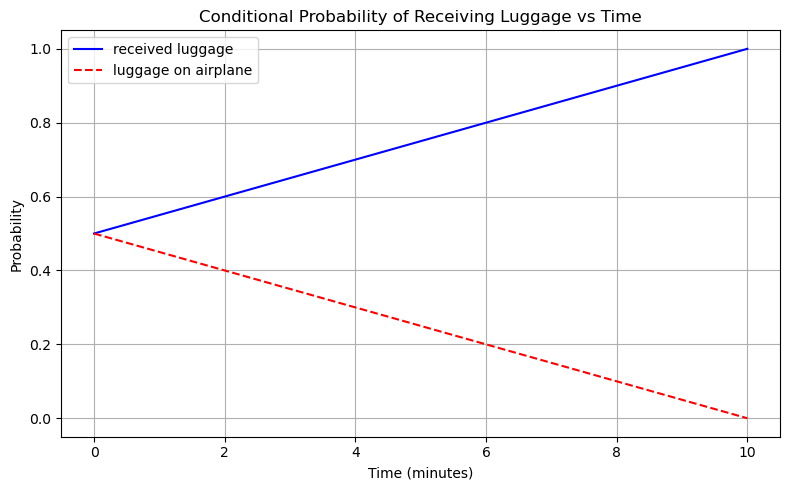

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Time range from 1 to 10 minutes
t = np.linspace(0, 10, 500)

# Probability of receiving the luggage at time t
P_received = 0.5 + (t / 10) * 0.5

# Probability of luggage still on the airplane at time t
P_on_airplane = 1 - P_received

# Create the plot
plt.figure(figsize=(8, 5))

# Plot the probability of receiving the luggage (P_received)
plt.plot(t, P_received, label='received luggage', color='blue')

# Plot the probability of luggage still on the airplane (P_on_airplane)
plt.plot(t, P_on_airplane, label='luggage on airplane', color='red', linestyle='--')

# Labels and title
plt.title('Conditional Probability of Receiving Luggage vs Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Bonus 2. Simpson’s Paradox in Clinical Studies: When the Treatment Effect Reverses (optional)

### A. Take the gender as a confounding factor on both drug and disease: gender is considered a confounder, meaning it affects both the treatment (drug) and the outcome (disease). The drug has a direct effect on the disease.

In this case, gender is a confounding factor, meaning that gender influences both the treatment (drug) and the outcome (disease). A confounding factor is a variable that distorts the apparent relationship between the treatment and the outcome.

When we control for gender, we see that the drug has a negative effect on both genders, but it might appear beneficial when looking at the overall population without considering gender differences. This is why it’s important to consider gender as a confounder—without doing so, we could incorrectly conclude that the drug is effective for the entire population.

Analysis by Gender:
Men:

In the control group (no medication): 19 men are healthy (0 disease), and 1 has the disease (1 disease), with a ratio of 19:1.

In the treatment group (medication): 37 men are healthy, and 3 have the disease, with a ratio of 37:3. The drug doesn't seem to improve the situation for men and might actually worsen it.

Women:

In the control group: 28 women are healthy, and 12 have the disease, with a ratio of 28:12.

In the treatment group: 12 women are healthy, and 8 have the disease, showing a worsening effect after taking the medication.

So, after controlling for gender, we see that the medication is not as effective as it seems when looking at the total population. It’s important to factor in gender here as a confounder.

In [2]:
import pandas as pd

# Original data
data = {
    "Group": ["Male, No Drug", "Male, Drug", "Female, No Drug", "Female, Drug"],
    "Disease=0": [19, 37, 28, 12],
    "Disease=1": [1, 3, 12, 8]
}

df = pd.DataFrame(data)
df["Total"] = df["Disease=0"] + df["Disease=1"]
df["Disease Rate"] = df["Disease=1"] / df["Total"]

# Total summary
total_no_drug = 19 + 28
total_no_drug_disease = 1 + 12

total_drug = 37 + 12
total_drug_disease = 3 + 8

overall_rates = {
    "Group": ["Total No Drug", "Total Drug"],
    "Disease=0": [total_no_drug, total_drug],
    "Disease=1": [total_no_drug_disease, total_drug_disease],
}
overall_df = pd.DataFrame(overall_rates)
overall_df["Total"] = overall_df["Disease=0"] + overall_df["Disease=1"]
overall_df["Disease Rate"] = overall_df["Disease=1"] / overall_df["Total"]

print("Grouped by Gender:")
display(df)

print("\nOverall:")
display(overall_df)

Grouped by Gender:


,Group,Disease=0,Disease=1,Total,Disease Rate
0,"Male, No Drug",19,1,20,0.050
1,"Male, Drug",37,3,40,0.075
2,"Female, No Drug",28,12,40,0.300
3,"Female, Drug",12,8,20,0.400



Overall:


,Group,Disease=0,Disease=1,Total,Disease Rate
0,Total No Drug,47,13,60,0.216667
1,Total Drug,49,11,60,0.183333
